# Technical Parameters

## Package loading

In [1]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


### Project name

In [2]:
name = 'classification_kindey_stone'

### Thresholds & other parameters

In [3]:
problem_type = 'classification'

In [4]:
data_size = 'small'

In [5]:
threshold_NaN = 0.5

In [6]:
threshold_cat = 5

In [7]:
threshold_Z = 3.0

In [8]:
test_size = 0.33

In [9]:
threshold_entropy = 0.75

In [10]:
undersampling = False

In [11]:
undersampler = 'Random'

In [12]:
threshold_corr = 1.0

In [13]:
threshold_model = 5

In [14]:
threshold_score = 0.7

In [15]:
threshold_feature = 5

In [16]:
with_keras = False

In [17]:
CPU = False

In [18]:
time_dep = False

In [19]:
date_idx = 0

In [20]:
lag_number = 3

In [21]:
level_1_model = 'regression'

In [22]:
random_state = 42

### File & target

In [23]:
path = '/home/fifi/Documents/ezstacking/dataset/kindey stone urine analysis.csv'

In [24]:
df = pd.read_csv(path)

In [25]:
target_col = 'target'

### Deployment

In [26]:
FastAPI_port = 8000

In [27]:
Docker_port = 80

# Exploratory Data Analysis (EDA)

## Drop user's columns & Duplicates

In [28]:
user_drop_cols = []

Dataset before deletion

In [29]:
display(df)

gravity    ph  osmo  cond  urea   calc  target
0     1.021  4.91   725  14.0   443   2.45       0
1     1.017  5.74   577  20.0   296   4.49       0
2     1.008  7.20   321  14.9   101   2.36       0
3     1.011  5.51   408  12.6   224   2.15       0
4     1.005  6.52   187   7.5    91   1.16       0
..      ...   ...   ...   ...   ...    ...     ...
74    1.025  7.90   721  23.6   301   9.04       1
75    1.017  4.81   410  13.3   195   0.58       1
76    1.024  5.40   803  21.8   394   7.82       1
77    1.016  6.81   594  21.4   255  12.20       1
78    1.015  6.03   416  12.8   178   9.39       1

[79 rows x 7 columns]

In [30]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [31]:
df = duplicates(df)

No duplicate rows.


Drop all the rows for which the target is NaN

In [32]:
df = df.dropna(subset=[target_col])

Dataset after deletion of user’s columns and duplicates

In [33]:
display(df)

gravity    ph  osmo  cond  urea   calc  target
0     1.021  4.91   725  14.0   443   2.45       0
1     1.017  5.74   577  20.0   296   4.49       0
2     1.008  7.20   321  14.9   101   2.36       0
3     1.011  5.51   408  12.6   224   2.15       0
4     1.005  6.52   187   7.5    91   1.16       0
..      ...   ...   ...   ...   ...    ...     ...
74    1.025  7.90   721  23.6   301   9.04       1
75    1.017  4.81   410  13.3   195   0.58       1
76    1.024  5.40   803  21.8   394   7.82       1
77    1.016  6.81   594  21.4   255  12.20       1
78    1.015  6.03   416  12.8   178   9.39       1

[79 rows x 7 columns]

### Dataset copy

In [34]:
df_copy = df.copy()

## Dataset Information

### Dataframe structure

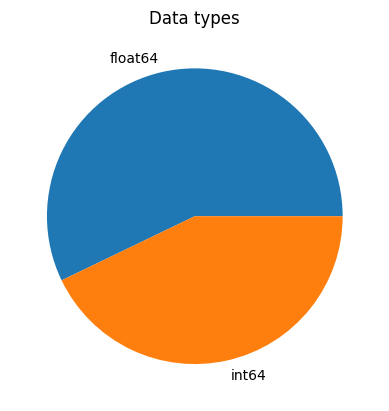

In [35]:
plot_dataframe_structure(df)

### Dataframe statistics

In [36]:
display(df.describe().T)

count        mean         std      min      25%      50%       75%  \
gravity   79.0    1.018114    0.007239    1.005    1.012    1.018    1.0235   
ph        79.0    6.028481    0.724307    4.760    5.530    5.940    6.3850   
osmo      79.0  612.848101  237.514755  187.000  413.000  594.000  792.0000   
cond      79.0   20.813924    7.938994    5.100   14.150   21.400   26.5500   
urea      79.0  266.405063  131.254550   10.000  160.000  260.000  372.0000   
calc      79.0    4.138987    3.260051    0.170    1.460    3.160    5.9300   
target    79.0    0.430380    0.498293    0.000    0.000    0.000    1.0000   

             max  
gravity     1.04  
ph          7.94  
osmo     1236.00  
cond       38.00  
urea      620.00  
calc       14.34  
target      1.00

## Which columns could be categorical ?

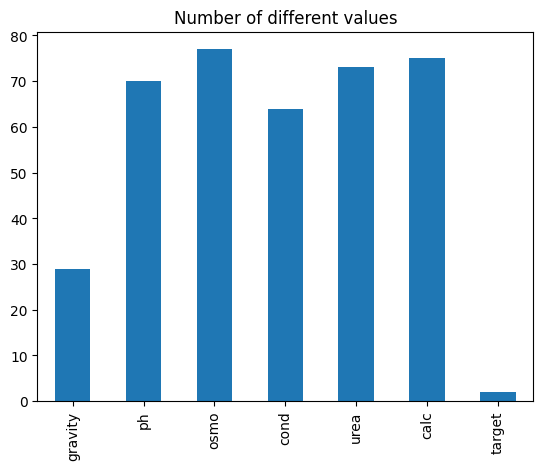

In [37]:
plot_categorical(df)

## Dataset Cleaning

### Drop NaN:

In [38]:
df, drop_cols = drop_na(df, target_col, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [39]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [40]:
display(dropped_cols)

array([], dtype=float64)

### Encoding data:

In [41]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: gravity
Encoding numeric column: ph
Encoding numeric column: osmo
Encoding numeric column: cond
Encoding numeric column: urea
Encoding numeric column: calc
Column  target  is categorical.


### Imputing NaN using IterativeImputer

#### Imputation

In [42]:
df = imputation(df)

No need to impute data.


### Data compression:

In [43]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.00MB
Memory usage after optimization is: 0.00MB
Decreased by 74.6%


#### Dataframe structure after compression

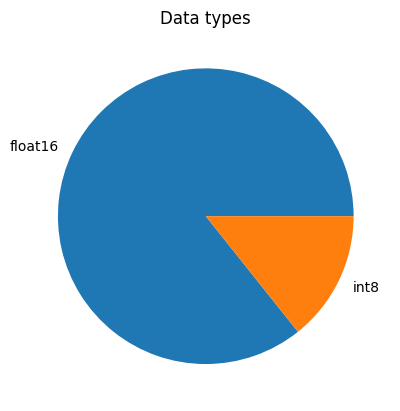

In [44]:
plot_dataframe_structure(df)

### Outliers:

In [45]:
df = outliers(df, threshold_Z)

Using Z_score,  2  rows will be suppressed.


### Correlation according to Pearson

In [46]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [47]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Check columns that should be dropped

In [48]:
print(dropped_cols)

[]


### Correlation according to Spearman (hierarchical clustering)

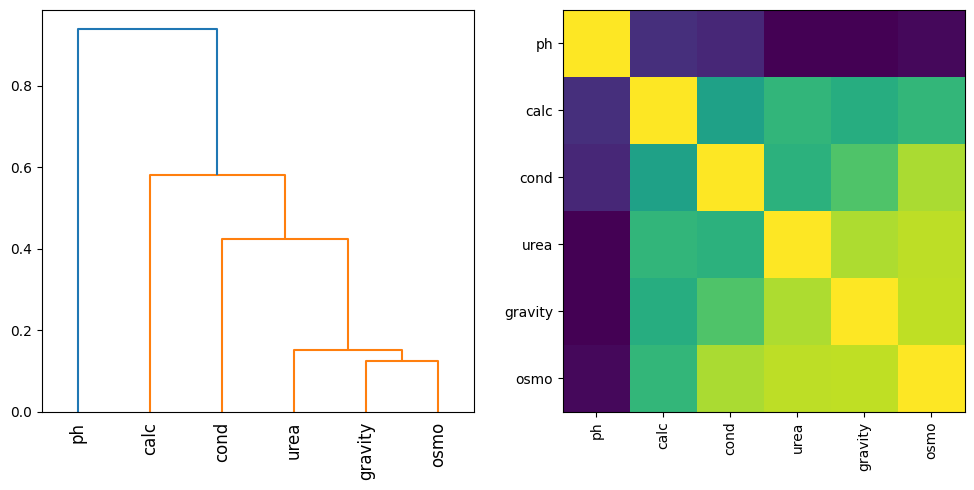

cluster_ids =  [1 1 1 1 1 1]
selected_features_names =  ['gravity']


In [49]:
selected_features_names = hierarchical_clustering(df.drop(target_col, axis=1), t=1) 
print('selected_features_names = ', selected_features_names)

### Class balancing

In [50]:
print('Entropy = ', shannon_entropy(df[target_col]))

Entropy =  0.9793399259567799


# Splitting

In [51]:
df = df_copy

## Splitting dataframe in features and targets

In [52]:
y = df[target_col]

In [53]:
X = df.drop(target_col, axis=1)

### Dimensions

In [54]:
nb_features = len(X.columns.tolist())

In [55]:
nb_targets = len(y.unique())

In [56]:
layer_size = nb_features + nb_targets + 2

### Splitting data in train and test sets 

In [57]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling=undersampling, undersampler=undersampler, random_state=random_state)

### Encoding

In [58]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

# Modeling: Model selection

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [59]:
cat_selector, num_selector = get_features()

#### For models based on tree

In [60]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [61]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [62]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

#### For models not based on tree

In [63]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [64]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [65]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

#### Level-0 models

In [66]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTCG', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='gini', random_state = random_state))), 
          ('DTCE', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='entropy', random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('MLPC1', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPC2', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('SVCL', make_pipeline(ntree_preprocessor, SVC(kernel='linear', random_state = random_state))), 
          ('SVCP', make_pipeline(ntree_preprocessor, SVC(kernel='poly', random_state = random_state))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf', random_state = random_state))), 
          ('SVCS', make_pipeline(ntree_preprocessor, SVC(kernel='sigmoid', random_state = random_state))), 
          ]

#### Level-1 model

In [67]:
level_1 = RidgeClassifier(alpha=1, positive=True, random_state = random_state)

#### Stacking for classification

In [68]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

## Model fitting

In [69]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anac

CPU times: user 406 ms, sys: 167 ms, total: 573 ms
Wall time: 5.94 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                                  0    gravity
1         ph
2       osmo
3       cond
4       urea
5       calc
Name: column_name, dtype: object),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simple...
Name: column_name, dtype: object),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  Series([], Name: column_name, dtype: object))])),
                                                ('svc',
                                                 SVC(kernel='sigmoid',
                                                     random_state=42))]))],
                   final_estimator=RidgeClassifier(alpha=1, positive=True,
                                                   random_state=42),
                   n_jobs=-1)

## Model evaluation

### Model scoring

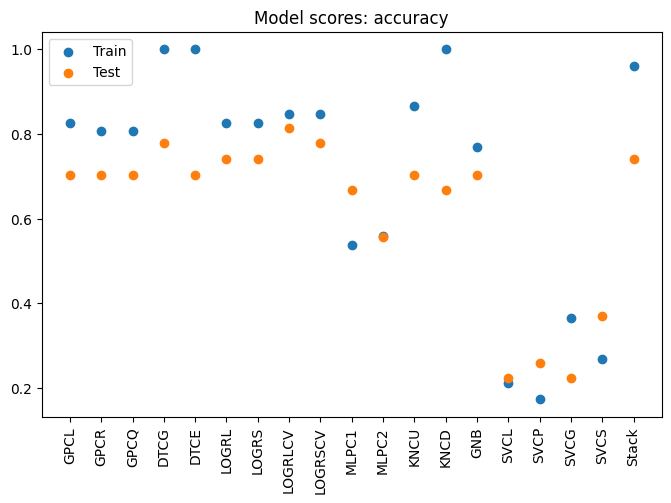

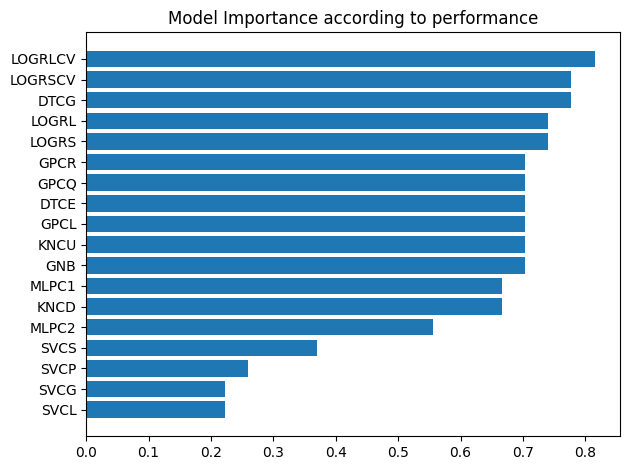

In [70]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### Classification report

In [71]:
K_classification_report(model, X_train, y_train, X_test, y_test)

### Confusion matrix

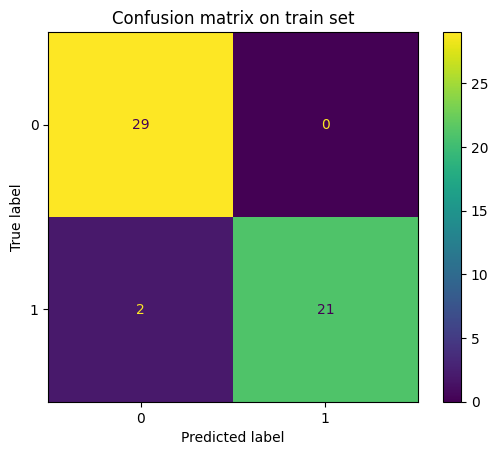

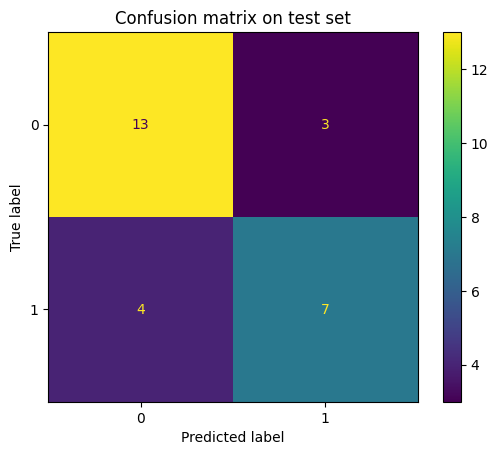

In [72]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

## Model inspection

### Model importance

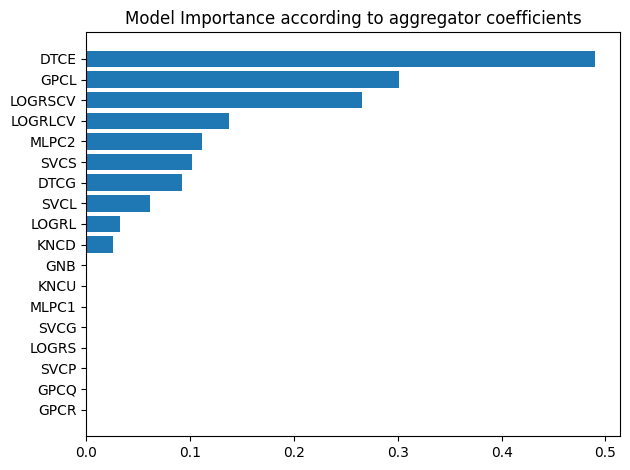

In [73]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

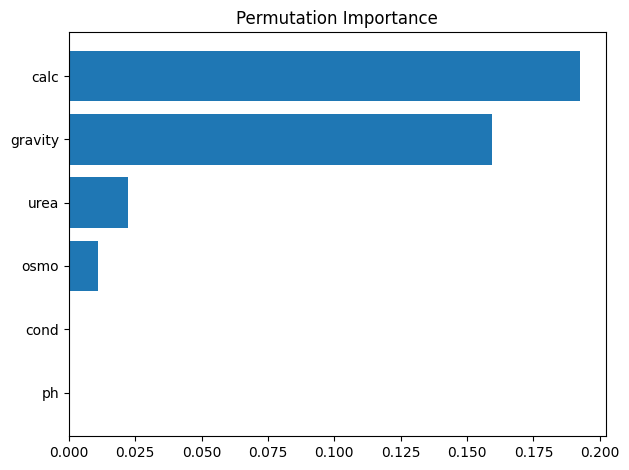

In [74]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Modeling: Feature selection

#### Filtered Level-0 models

In [75]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Build filtered model

In [76]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

## Filtered Model fitting

In [77]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant

CPU times: user 81.6 ms, sys: 15.3 ms, total: 96.9 ms
Wall time: 1.9 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                                  0    gravity
1         ph
2       osmo
3       cond
4       urea
5       calc
Name: column_name, dtype: object),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simple...
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  Series([], Name: column_name, dtype: object))])),
                                                ('logisticregressioncv',
                                                 LogisticRegressionCV(cv=5,
                                                                      random_state=42,
                                                                      solver='saga'))]))],
                   final_estimator=RidgeClassifier(alpha=1, positive=True,
                                                   random_state=42),
                   n_jobs=-1)

## Filtered Model evaluation

### Filtered Model scoring

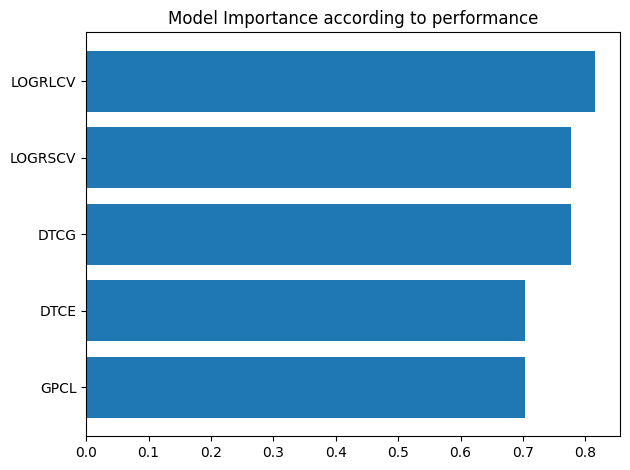

In [78]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered Classification report

In [79]:
K_classification_report(model, X_train, y_train, X_test, y_test)

### Filtered Confusion matrix

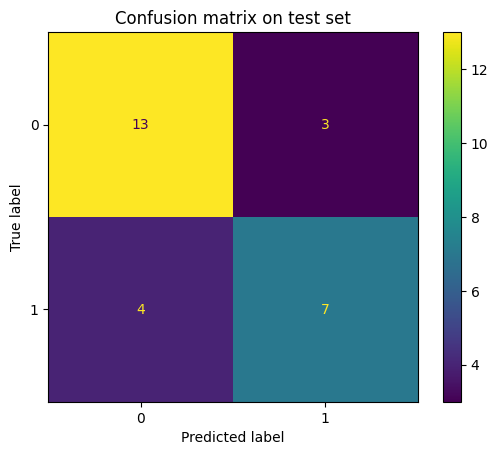

In [80]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

## Filtered Model inspection

### Filtered Model importance

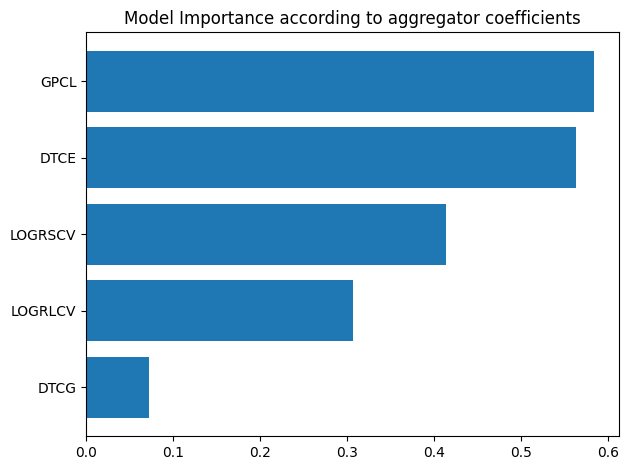

In [81]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

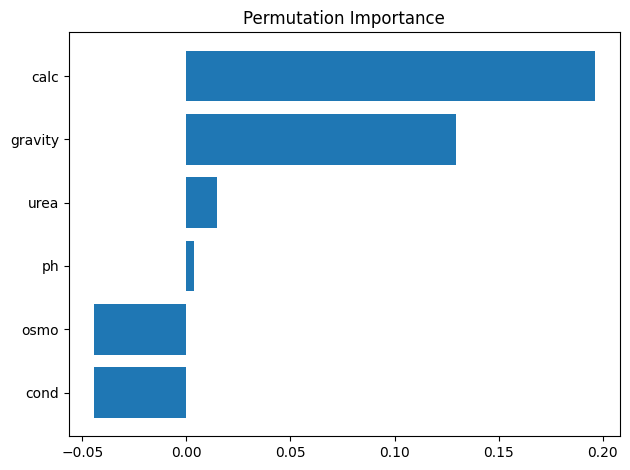

In [82]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [83]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [84]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [85]:
print(dropped_cols)

['cond']


# Modeling: Final model

In [86]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [87]:
reduce_schema('column_name', dropped_cols)

## Splitting

### Splitting dataframe in features and targets

In [88]:
y = df[target_col] 

In [89]:
X = df.drop(target_col, axis=1) 

### Dimensions

In [90]:
nb_features = len(X.columns.tolist()) 

In [91]:
nb_targets = len(y.unique()) 

In [92]:
layer_size = nb_features + nb_targets + 2 

### Splitting data in train and test sets 

In [93]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

### Encoding

In [94]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test)) 

## Final model building

#### Select the categorical and numerical columns

In [95]:
cat_selector, num_selector = get_features() 

#### For models based on tree

In [96]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 

In [97]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True)) 

In [98]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)) 

#### For models not based on tree

In [99]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 

In [100]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler()) 

In [101]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)) 

#### Final level-0 models

In [102]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTCG', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='gini', random_state = random_state))), 
          ('DTCE', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='entropy', random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('MLPC1', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPC2', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('SVCL', make_pipeline(ntree_preprocessor, SVC(kernel='linear', random_state = random_state))), 
          ('SVCP', make_pipeline(ntree_preprocessor, SVC(kernel='poly', random_state = random_state))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf', random_state = random_state))), 
          ('SVCS', make_pipeline(ntree_preprocessor, SVC(kernel='sigmoid', random_state = random_state))), 
          ]

In [103]:
level_0_f = list(set(level_0) & set(model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)))

#### Build the final model

In [104]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

## Final Model fitting

In [105]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

CPU times: user 106 ms, sys: 8.71 ms, total: 115 ms
Wall time: 1.69 s


StackingClassifier(estimators=[('DTCG',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42))]),
                                                                                  0    gravity
1         ph
2       osmo
3       urea
4       calc
Name: column_name, dtype: object),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_fre...
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('ordinalencoder',
                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                  unknown_value=-1))]),
                                                                                  Series([], Name: column_name, dtype: object))])),
                                                ('decisiontreeclassifier',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        random_state=42))]))],
                   final_estimator=RidgeClassifier(alpha=1, positive=True,
                                                   random_state=42),
                   n_jobs=-1)

## Final Model evaluation

### Final Model scoring

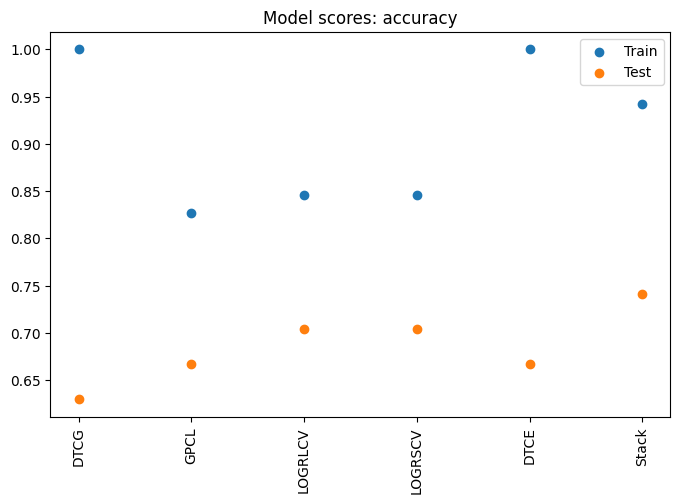

In [106]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

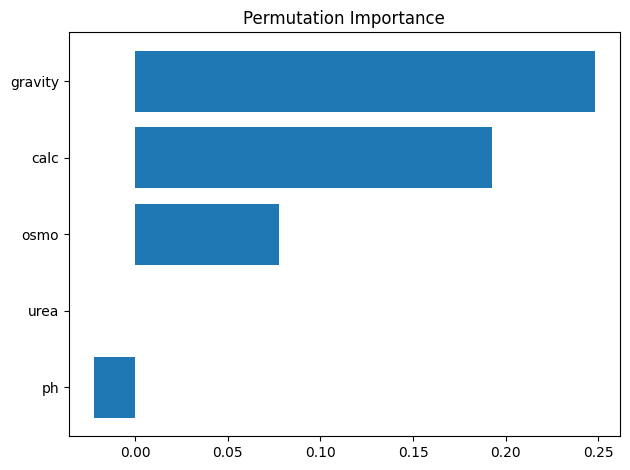

In [107]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

### Final feature elimination

In [108]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final Classification report

In [109]:
K_classification_report(model, X_train, y_train, X_test, y_test)

### Final Confusion matrix

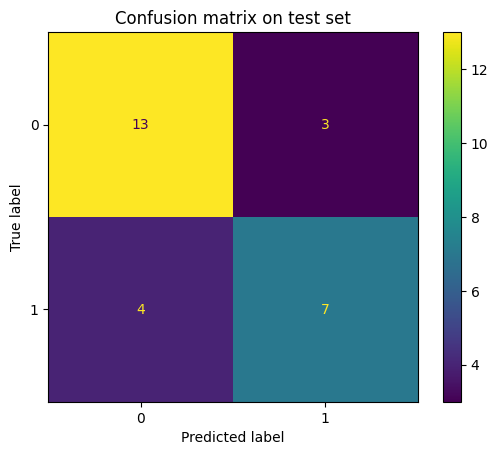

In [110]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

## Final Model inspection

### Final Model importance

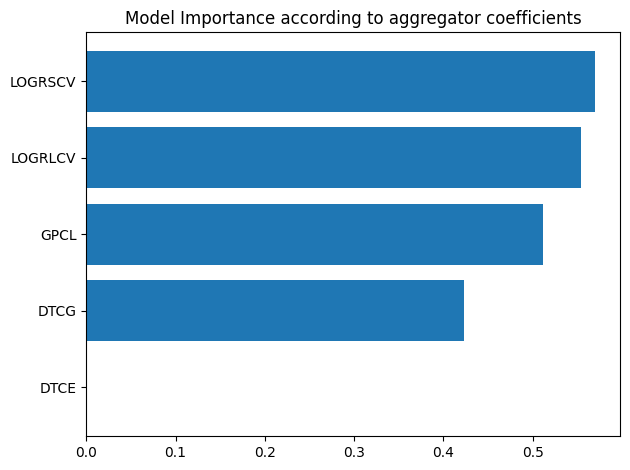

In [111]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

In [112]:
plot_perm_importance(model, X_test, y_test, CPU)

array([['ph', -0.011111111111111138],
       ['urea', 0.014814814814814791],
       ['osmo', 0.06296296296296293],
       ['calc', 0.21111111111111108],
       ['gravity', 0.2333333333333333]], dtype=object)

### Final Partial Dependence & Individual Conditional Expectation 

In [113]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU, target_encoder=target_encoder)

interactive(children=(Dropdown(description='feature', options=('gravity', 'ph', 'osmo', 'urea', 'calc'), value…

# Test & Deployment

### Save the model

In [114]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate the server

In [115]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port, with_keras)

### [Test the API](./server.ipynb)

### Docker

In [116]:
dockerize(name, model, model_name, X, y, Docker_port, with_keras)